<font size=4.5><b>
<br> Module 7 Assignment
<br> Perform PCA for Dimensions 6 to 10 of Chile’s Tourism Region
<br> Chuyu Chen
<br> Nov 13th, 2020

---------
## Dimensions 1 to 5 of Chile’s Tourism Regions

In [1]:
# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
# Set additional parameters for charts and tables

# Remove column display limits
pd.set_option('display.max_columns', None)
# pd.set_option('display.height', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style("white")

In [3]:
# Read data in csv format, using encoding, and read the third row as column names
chile_data = pd.read_csv('Tourism.csv', encoding = 'ISO-8859-1', header = 3)

In [4]:
# Remove first 2 columns
chile_data.drop(chile_data.iloc[:, 0:2], inplace = True, axis = 1)

In [5]:
# Print the whole dataframe
chile_data.head()

,VARIABLE,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES
0,Arica y Parinacota,31.0,2,0,30,28,4,22.1,2,105,12,2,25.4,1,0,0,0,4,32,4,3,9,32,7,59,-,21.9,0.46,58.00,1,0.00,5,-,13,13,4,6,6,2,0,8,2,0,0,2,-,0,1,42.556,0.88,"$ 293,648",94.1,83.8,11.1,53.0,2,193,11,20.038,356,23.69,18.74,"6,544",33.01,37.0,2.3,5,3,0.0,0,"97,454","34,186","1,151,575",5.2730,2.129,17.35,"45,248","15,045",13,"167,211",4.67,3
1,Tarapac,0.0,5,1,13,73,5,20.8,2,178,12,1,12.6,1,0,0,0,0,34,10,1,6,34,12,0,0.2,9.1,0.03,76.03,1,0.00,16,-,2,6,1,1,7,5,0,5,6,4,2,3,5,0,0,68.563,1.45,"$ 381,466",91.7,66.7,10.7,42.0,5,255,19,22.180,380,23.03,22.17,"11,108",41.43,42.8,2.1,5,10,0.0,11,"235,365","40,919","19,560",4.1850,4.021,15.90,"81,182","17,161",0,"434,727",184.10,1
2,Antofagasta,1.0,9,0,28,81,16,27.4,8,203,15,2,5.7,2,1,0,3,1,24,37,0,4,31,26,63,-,2.8,0.03,39.56,2,0.00,22,-,5,28,8,13,3,14,1,6,10,6,4,0,5,0,0,54.486,1.08,"$ 475,866",91.7,66.7,10.6,40.0,7,529,47,20.446,184,24.55,22.76,"19,920",35.02,44.6,1.8,2,10,17.0,15,"413,922","84,195","22,898",2.0244,3.332,52.25,"112,607","315,888",0,"115,100",23.00,5
3,Atacama,8.0,10,0,8,35,7,20.0,0,144,12,0,7.5,0,0,0,0,0,18,5,0,2,29,7,33,-,2.0,0.02,40.76,0,3.93,17,NaN,7,23,2,7,2,10,0,3,13,1,3,2,5,1,0,51.844,0.94,"$ 379,971",89.

In [6]:
# Remove the last row with aggregated Total data
chile_data = chile_data[:-1]
# Rename the first column
chile_data = chile_data.rename(columns={'VARIABLE': 'Region'})
# Check NaNs in the dataset
chile_data.isnull().sum(axis = 0)


Region                                                                       0
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR                                0
NUMBER OF CULTURAL CENTERS                                                   0
WORLD CULTURAL HERITAGE SITES                                                0
NUMBER OF ARCHEOLOGICAL SITES                                                0
NATIONAL MONUMENTS                                                           0
MUSEUMS                                                                      0
% OF POPULATION THAT ATTENDS MUSEUMS                                         0
THEATERS                                                                     0
NUMBER OF THEATER PLAYS PER YEAR                                             0
LIBRARIES                                                                    0
GALERIES                                                                     0
% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP   

In [7]:
# Remove $ symbol
chile_data = chile_data.replace(r'[<$]', '', regex = True)

In [8]:
# Remove commas from numbers
chile_data = chile_data.replace(',','', regex = True)
# Remove `-` character
chile_data = chile_data.replace('-','', regex = True)
# Replace empty values with NaNs
chile_data = chile_data.replace(r'^\s*$', np.nan, regex = True)

In [9]:
# Impute data in four columns
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
## carry out YOUR Imputation here

chile_data[['% OF LAND THAT CORRESPONDS TO FORESTS', 
            'LAND AFFECTED BY WILDFIRES', 
            'PRESERVED SITES', 
            'NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY']] = imputer.fit_transform(chile_data[['% OF LAND THAT CORRESPONDS TO FORESTS', 
                                                                                                  'LAND AFFECTED BY WILDFIRES', 
            'PRESERVED SITES', 
            'NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY']])

In [10]:
chile_data.isnull().sum(axis = 0)[0:10]
# As we can see below, we do not have any missing values anymore

Region                                           0
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR    0
NUMBER OF CULTURAL CENTERS                       0
WORLD CULTURAL HERITAGE SITES                    0
NUMBER OF ARCHEOLOGICAL SITES                    0
NATIONAL MONUMENTS                               0
MUSEUMS                                          0
% OF POPULATION THAT ATTENDS MUSEUMS             0
THEATERS                                         0
NUMBER OF THEATER PLAYS PER YEAR                 0
dtype: int64

In [11]:
# check the correlation
cor = chile_data.corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

NATIONAL MONUMENTS                                                         NUMBER OF CULTURAL CENTERS                                                   0.844259
MUSEUMS                                                                    NUMBER OF CULTURAL CENTERS                                                   0.863417
                                                                           NATIONAL MONUMENTS                                                           0.842485
% OF POPULATION THAT ATTENDS MUSEUMS                                       NUMBER OF ARCHEOLOGICAL SITES                                                0.563521
THEATERS                                                                   NUMBER OF CULTURAL CENTERS                                                   0.810156
                                                                           NATIONAL MONUMENTS                                                           0.943688
                                  

In [12]:
# Select columns
cols = ['AVERAGE MONTHLY INCOME (CHILEAN PESOS)',
          'NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS',
          'NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.',
          'NATIONAL TOURISTS ARRIVALS',
          'INTERNATIONAL TOURISTS ARRIVALS',
          'NUMBER OF VEHICLES',
          'VISITORS TO PROTECTED SITES',
          "TOURIST'S ARRIVALS THROUGH BORDER LINES"]

# Convert
chile_data[cols] = chile_data[cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)
# Now all our columns are integers or floats


In [13]:
chile_data=chile_data.drop(chile_data.columns[0], axis=1)

In [14]:
idx = 0
new_col = ['Arica y Parinacota', 'Tarapaca', 'Antofagasta',
         'Atacama', 'Coquimbo','Valparaiso','Metropolitana',
          "O'Higgins",'Maule','Biobio','Araucania','Los Rios',
          'Los Lagos','Aysen','Magallanes y Antartica']
chile_data.insert(loc=idx, column='Region', value=new_col)

In [15]:
chile_data

,Region,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES
0,Arica y Parinacota,31.0,2,0,30,28,4,22.1,2,105,12,2,25.4,1,0,0,0,4,32,4,3,9,32,7,59,21.291667,21.9,0.46,58.00,1,0.00,5,1.138182,13,13,4,6,6,2,0,8,2,0,0,2,5.230769,0,1,42.556,0.88,293648,94.1,83.8,11.1,53.0,2,193,11,20.038,356,23.69,18.74,6544,33.01,37.0,2.3,5,3,0.0,0,97454,34186,1.151575e+06,5.2730,2.129,17.35,45248,15045,13,167211,4.67,3
1,Tarapaca,0.0,5,1,13,73,5,20.8,2,178,12,1,12.6,1,0,0,0,0,34,10,1,6,34,12,0,0.200000,9.1,0.03,76.03,1,0.00,16,1.138182,2,6,1,1,7,5,0,5,6,4,2,3,5.000000,0,0,68.563,1.45,381466,91.7,66.7,10.7,42.0,5,255,19,22.180,380,23.03,22.17,11108,41.43,42.8,2.1,5,10,0.0,11,235365,40919,1.956000e+04,4.1850,4.021,15.90,81182,17161,0,434727,184.10,1
2,Antofagasta,1.0,9,0,28,81,16,27.4,8,203,15,2,5.7,2,1,0,3,1,24,37,0,4,31,26,63,21.291667,2.8,0.03,39.56,2,0.00,22,1.138182,5,28,8,13,3,14,1,6,10,6,4,0,5.000000,0,0,54.486,1.08,475866,91.7,66.7,10.6,40.0,7,529,47,20.446,184,24.55,22.76,19920,35.02,44.6,1.8,2,10,17.0,15,413922,84195,2.289800e+04,2.0244,3.332,52.25,112607,315888,0,115100,23.00,5
3,Atacama,8.0,10,0,8,35,7,20.0,0,144,12,0,7.5,0,0,0,0,0,18,5,0,2,29,7,33,21.291667,2.0,0.02,40.76,0,3.93,17,1.138182,7,23,2,7,2,10,0,3,13,1,3,2,5.000000,1,0,51.844

In [16]:
#chile_data1 = chile_data
chile_data = chile_data.sort_values('Region', ascending = False).reset_index(drop=True)


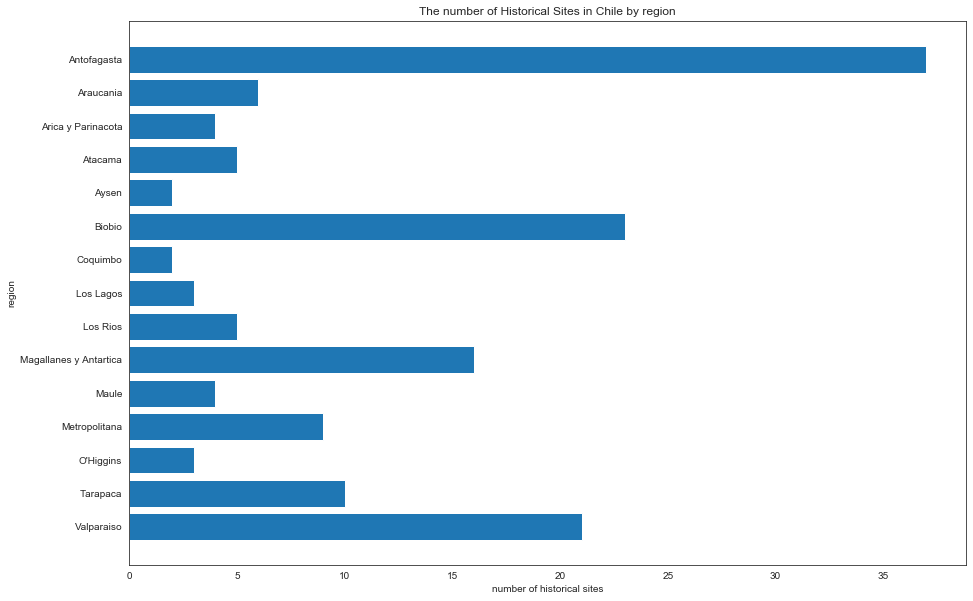

In [17]:
fig, ax = plt.subplots()
#chile_sorted = chile_data.sort_values('HISTORICAL SITES',inplace=True)

xaxis = chile_data['Region']
yaxis = chile_data['HISTORICAL SITES']
ax.barh(xaxis,yaxis)


plt.xlabel("number of historical sites")
plt.ylabel("region")
#plt.gca().invert_yaxis()
ax.set_title('The number of Historical Sites in Chile by region')
plt.show()

### PCA

In [18]:
# Standardize data
chile_data_s = chile_data.copy()
scaler = StandardScaler()

In [19]:
chile_data_s.loc[:, chile_data_s.columns != 'Region'] = scaler.fit_transform(chile_data_s.loc[:, chile_data_s.columns != 'Region'])

# Set region as an index column
chile_data_s = chile_data_s.set_index('Region')

In [20]:
# Calculate eigenvalues and vectors
cov_mat = np.cov(chile_data_s.T)
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [21]:
# Run PCA and fit the model
myPCA = PCA()
x     = myPCA.fit(chile_data_s)

In [22]:
# Calculate the numeric values of principal components
x.explained_variance_ratio_.cumsum()

array([0.31056255, 0.43909692, 0.55395713, 0.66474306, 0.74173449,
       0.79144989, 0.8402379 , 0.87698473, 0.90761689, 0.93576086,
       0.95599501, 0.97398201, 0.98811612, 1.        , 1.        ])

In [23]:
# Explore the importance of each feature for principle components
pca = PCA(n_components = 7).fit(chile_data_s)
vars_ = pca.explained_variance_ratio_
c_names = chile_data_s.columns
sum_ = 0

In [24]:
print('Variance:  Projected dimension')
print('------------------------------')
for idx, row in enumerate(pca.components_):
    output = 100.0*vars_[idx]    
    output = '{0:4.1f}%:    '.format(100.0 * vars_[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
                      for val, name in zip(row, c_names))
    sum_ += 100*vars_[idx]
    print(output)

print('Total variance explained by the 7 components {0:4.1f}%'.format(sum_))
# Total variance explained by the 7 components 84.0%

Variance:  Projected dimension
------------------------------
31.1%:    -0.00 * CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR +  0.18 * NUMBER OF CULTURAL CENTERS +  0.04 * WORLD CULTURAL HERITAGE SITES + -0.01 * NUMBER OF ARCHEOLOGICAL SITES +  0.19 * NATIONAL MONUMENTS +  0.18 * MUSEUMS +  0.04 * % OF POPULATION THAT ATTENDS MUSEUMS +  0.18 * THEATERS +  0.18 * NUMBER OF THEATER PLAYS PER YEAR +  0.18 * LIBRARIES +  0.19 * GALERIES + -0.09 * % OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP +  0.18 * NUMBER OF EXHIBITS + -0.00 * ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR +  0.00 * MAJOR SPORTS EVENTS PER YEAR +  0.08 * OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS +  0.00 * ARTWORK SITES + -0.02 * POPULAR ARCHITECTURE SITES +  0.03 * HISTORICAL SITES +  0.07 * LOCAL MARKETS +  0.06 * CULTURAL SITES LEVEL III (INTERNATIONAL) +  0.15 * CULTURA SITES LEVEL II (NATIONAL) +  0.19 * CULTURAL SITES LEVEL I (LOCAL) +  0.12 * HERITAGE ARCHITECTURAL HOUSES + -0.08 * 

In [25]:
# We also can see this information for each component separately
# For instance, these are results for the Principal Component 1 (sorted)
pd.DataFrame(np.column_stack((chile_data_s.columns, pca.components_[0]))).sort_values(by = 1, ascending = False)[0:10]
# The same logic can be applied to all other principal components

,0,1
55,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED ...,0.190521
75,NUMBER OF VEHICLES,0.190228
4,NATIONAL MONUMENTS,0.189368
10,GALERIES,0.189226
26,% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,0.189172
56,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED...,0.188437
58,CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURIS...,0.186791
22,CULTURAL SITES LEVEL I (LOCAL),0.186464
54,TOURISM-ORIENTED INSTITUTIONS,0.185947
66,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RE...,0.185657


In [26]:
# Calculate loadings
myPCA = PCA(n_components = 7)
pca_model = myPCA.fit(chile_data_s)

# Print
# print("The loadings are are \n {}".format(pca_model.components_))

In [27]:
# Calculate factor scores
pca_model = myPCA.fit_transform(chile_data_s)
PCcomponents = pd.DataFrame(data = pca_model, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
print("\n The Factor scores are")
PCcomponents


 The Factor scores are


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,5.666810,-5.185133,7.767526,-1.476143,-1.618477,0.063266,-2.100251
1,-1.603717,2.205502,0.000489,-3.106017,1.359288,2.146064,-0.009668
2,-0.533601,-4.130965,-2.604111,-1.666633,-1.291375,0.430387,0.879329
3,16.071582,4.590960,-2.013523,1.269896,-1.218331,0.133082,1.318211
4,-0.906211,-3.216091,-3.517245,0.026947,-0.489855,0.118975,0.163107
5,-4.383492,5.186719,3.361541,1.073879,-3.790125,-2.122415,0.056839
6,-2.270740,-0.234031,-2.562392,0.799648,1.506049,0.456833,0.681446
7,-0.571975,0.292343,3.611886,6.352109,6.280926,1.319659,0.674149
8,0.071800,-3.459654,1.681821,-3.193220,1.184838,-2.570795,4.848208
9,2.200100,-0.453991,-3.581660,-0.554127,2.180578,-2.483251,-2.047424


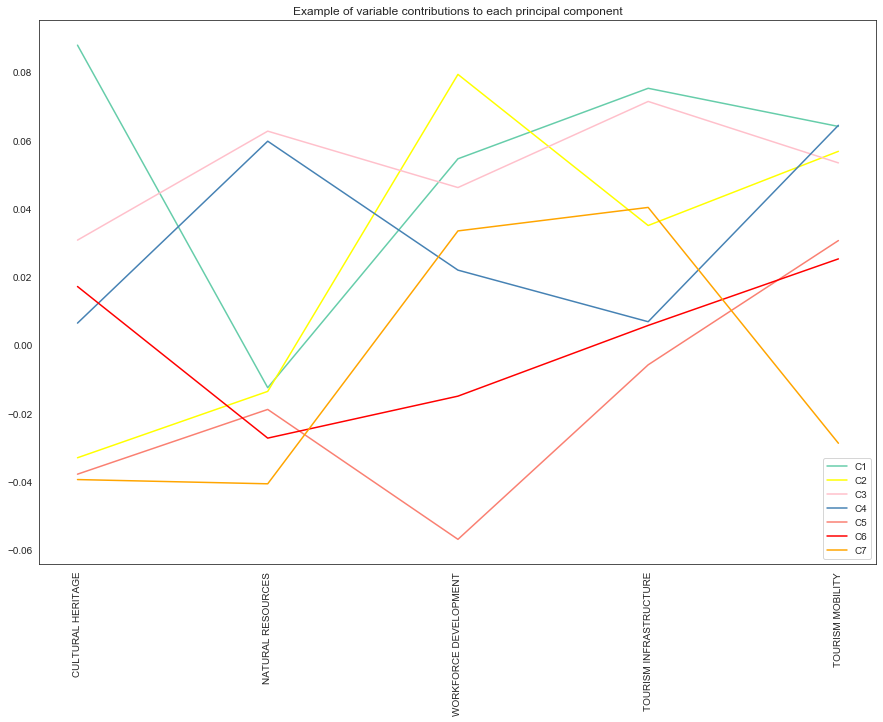

In [28]:
# Example of different variables in each component

# Fit the model
myPCA = PCA(n_components = 7)
pca_model = myPCA.fit(chile_data_s)
y_axis = [0,0,0,0,0,0,0]
for i in range(0,7):
    y_axis[i]=[np.mean(pca_model.components_[i][0:24]), np.mean(pca_model.components_[i][24:47]), 
               np.mean(pca_model.components_[i][47:59]), np.mean(pca_model.components_[i][59:69]),
               np.mean(pca_model.components_[i][69:81])]
# Plot
x_axis = ['CULTURAL HERITAGE', 'NATURAL RESOURCES', 'WORKFORCE DEVELOPMENT', 'TOURISM INFRASTRUCTURE', 'TOURISM MOBILITY']
plt.plot(x_axis,y_axis[0], color = 'mediumaquamarine', label = "C1")
plt.plot(x_axis,y_axis[1], color = 'yellow', label = "C2")
plt.plot(x_axis,y_axis[2], color = 'pink', label = "C3")
plt.plot(x_axis,y_axis[3], color = 'steelblue', label = "C4")
plt.plot(x_axis,y_axis[4], color = 'salmon', label = "C5")
plt.plot(x_axis,y_axis[5], color = 'red', label = "C6")
plt.plot(x_axis,y_axis[6], color = 'orange', label = "C7")
plt.xticks(rotation = 90)
plt.title('Example of variable contributions to each principal component')
plt.legend()
pass

In [29]:
# Creating a dataframe of weights
weights = pd.DataFrame(np.column_stack((chile_data_s.columns, pca_model.components_[0] * 
                                        pca_model.explained_variance_ratio_[0],
                                        pca_model.components_[1] * pca_model.explained_variance_ratio_[1],
                                        pca_model.components_[2] * pca_model.explained_variance_ratio_[2],
                                        pca_model.components_[3] * pca_model.explained_variance_ratio_[3],
                                        pca_model.components_[4] * pca_model.explained_variance_ratio_[4],
                                        pca_model.components_[5] * pca_model.explained_variance_ratio_[5],
                                        pca_model.components_[6] * pca_model.explained_variance_ratio_[6])))
weights = weights.set_index(0)

# Create a weighted average
weights['weighted_average'] = weights.sum(axis = 1)/np.sum(pca_model.explained_variance_ratio_)

# Print
weights.head()

,1,2,3,4,5,6,7,weighted_average
0,,,,,,,,
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,-0.0010135,-0.026766,-0.00772552,-0.00715039,-0.0100109,0.00849465,0.00587723,-0.045576
NUMBER OF CULTURAL CENTERS,0.0571644,-0.00259764,0.000907509,0.00659591,0.0036928,-0.00260661,-0.00364229,0.070830
WORLD CULTURAL HERITAGE SITES,0.0119041,-0.0165681,0.0228346,-0.0018949,0.0042953,0.00555241,-0.003667,0.026726
NUMBER OF ARCHEOLOGICAL SITES,-0.00224659,9.958e-05,0.0151014,-0.0179738,-0.00486953,0.0123346,-0.00910945,-0.007931
NATIONAL MONUMENTS,0.0588106,0.0068198,0.000424673,0.00349642,-0.00427658,3.51305e-05,-0.000404655,0.077246


In [30]:
# Ranking for dimension 1: CULTURAL HERITAGE AND EVENTS

# Create a dataframe for relevant variables
dim1 = chile_data_s.iloc[:, 0:24].mul(weights['weighted_average'][0:24], axis = 1)

# Create a score ranking
dim1['Ranking 1'] = dim1.sum(axis = 1)

# Sort by score
dim1.sort_values(by = 'Ranking 1', ascending = False)

,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,Ranking 1
Region,,,,,,,,,,,,,,,,,,,,,,,,,
Metropolitana,0.028078,0.192903,-0.014940,0.005556,0.269217,0.214340,0.018570,0.266501,0.287588,0.180319,0.259461,-0.008320,0.269909,0.039800,0.018823,0.008948,0.019085,-0.001139,0.000772,0.009099,-0.001584,0.180688,0.233427,0.028090,2.505190
Valparaiso,-0.010561,0.101121,0.074702,-0.012192,0.064396,0.017672,0.042596,-0.012705,-0.015399,0.042557,0.041223,-0.009270,-0.007536,-0.031840,-0.028235,0.014540,0.019085,0.001101,-0.008496,0.009099,0.069700,0.198829,0.021390,0.110586,0.692363
Biobio,0.024214,0.076968,-0.014940,0.006328,-0.021578,0.086078,-0.008459,0.009455,-0.007333,0.056140,0.041223,-0.008531,0.064394,0.039800,0.018823,-0.007829,-0.003817,-0.000722,-0.010041,-0.001400,-0.008373,-0.091432,0.071609,0.002380,0.312954
Los Lagos,0.039669,0.038323,0.029881,0.006328,-0.017363,0.009121,-0.001702,-0.008273,-0.017828,-0.005950,-0.031523,0.009313,-0.017811,0.039800,0.018823,-0.007829,0.041987,0.000580,0.005406,0.003850,-0.008373,0.079096,0.004650,-0.005204,0.204969
Antofagasta,0.039669,-0.034136,-0.014940,-0.015279,-0.003034,0.051875,0.055359,-0.008273,-0.021181,-0.036995,-0.019399,-0.006631,-0.017811,0.015920,0.018823,0.008948,0.030536,-0.000149,-0.020854,-0.011899,-0.001584,-0.015239,-0.006510,-0.010938,-0.023722
Tarapaca,0.043533,-0.053459,0.029881,-0.003704,-0.009777,-0.042184,0.005806,-0.034864,-0.022395,-0.042816,-0.031523,0.000655,-0.028087,0.039800,0.018823,-0.007829,0.041987,0.000372,-0.000000,-0.006649,0.001810,-0.004354,-0.045569,-0.022591,-0.173136
Magallanes y Antartica,0.043533,-0.063120,-0.014940,0.004784,-0.033378,-0.033633,0.057612,-0.034864,-0.030849,-0.038936,-0.043648,0.011319,-0.007536,0.039800,0.018823,-0.007829,0.019085,-0.000566,-0.004634,-0.011899,-0.004979,-0.040637,-0.048359,-0.016302,-0.241153
Coquimbo,-0.045336,-0.043798,-0.014940,0.004784,-0.027478,-0.025082,-0.012964,-0.026000,-0.027157,-0.023413,-0.019399,-0.010854,-0.038363,0.015920,0.018823,0.031318,0.030536,0.002195,0.006179,-0.006649,-0.008373,-0.022495,-0.003720,-0.004649,-0.250916
Los Rios,0.031941,-0.034136,-0.014940,0.005556,-0.043493,-0.016532,-0.028731,-0.030432,-0.026477,-0.042816,-0.019399,0.004984,-0.017811,0.015920,0.018823,-0.002237,0.041987,-0.000879,0.003862,-0.001400,-0.008373,-0.091432,-0.026040,-0.012417,-0.294472


In [31]:
# Ranking for dimension 2: NATURAL RESOURCES AND SUSTAINABILITY

# Create a dataframe for relevant variables
dim2 = chile_data_s.iloc[:, 24:47].mul(weights['weighted_average'][24:47], axis = 1)

# Create a score ranking
dim2['Ranking 2'] = dim2.sum(axis = 1)

# Sort by score
dim2.sort_values(by = 'Ranking 2', ascending = False)

,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,Ranking 2
Region,,,,,,,,,,,,,,,,,,,,,,,,
Los Lagos,3.994357e-02,0.001468,-0.030505,-0.013954,-0.029854,0.015650,-0.000457,8.902326e-03,-0.000437,-0.004235,-0.010288,-0.015863,0.000245,-0.001953,0.003823,-0.004355,0.021719,0.207479,0.043709,0.030237,2.027671e-01,0.106482,0.006901,0.577425
Metropolitana,-1.642051e-02,-0.003741,0.268483,0.015586,0.138076,0.015650,0.020110,8.589464e-03,0.000766,0.019904,0.034944,0.011442,-0.000108,0.006662,0.000348,0.001967,0.021719,-0.034927,0.043709,0.030237,-2.644788e-02,-0.030423,-0.013803,0.512320
Valparaiso,-1.687690e-02,-0.003116,0.051114,-0.005063,0.104490,0.015650,-0.047304,-4.303265e-02,-0.000570,-0.023292,0.026962,0.023145,-0.000179,-0.005399,0.003823,0.029363,0.012914,-0.034927,0.043709,-0.064535,-2.644788e-02,0.106482,0.027605,0.174514
Coquimbo,-2.338044e-02,-0.003915,-0.023316,-0.036409,-0.029854,0.015650,-0.022167,-2.829973e-03,0.000633,0.011646,0.016319,0.023145,-0.000321,-0.011429,0.009037,0.020934,0.021719,0.035449,0.019426,0.030237,-2.644788e-02,0.060847,0.006901,0.091873
Arica y Parinacota,-4.053551e-18,0.003551,-0.018664,0.042017,-0.029854,0.015650,0.014397,-1.736729e-18,-0.000570,0.013552,0.024301,-0.000260,0.000033,0.004939,0.009037,-0.000140,0.004109,-0.034927,0.043709,0.016698,1.017919e-16,-0.030423,0.006901,0.084054
Los Rios,2.830565e-02,-0.001658,-0.025007,-0.012412,-0.041050,0.015650,0.008684,7.807311e-03,0.000900,0.002117,0.000355,0.011442,0.000599,0.003216,0.009037,-0.014892,0.021719,0.004170,0.019426,0.030237,1.017919e-16,-0.030423,0.006901,0.045124
Aysen,2.636599e-02,0.009628,-0.037271,0.008020,-0.041050,0.015650,0.020110,8.824110e-03,-0.001639,-0.037268,-0.031574,-0.008062,0.000033,0.002355,-0.030934,-0.010678,0.021719,0.027629,-0.029139,-0.010380,8.815959e-02,-0.030423,0.027605,-0.012318
Tarapaca,-2.406503e-02,-0.000894,-0.036848,0.085458,-0.029854,0.015650,0.001828,-1.736729e-18,0.000900,0.017999,0.032283,0.019244,0.000104,0.002355,0.009037,-0.006463,-0.031111,-0.003649,-0.004857,0.009928,-2.644788e-02,-0.030423,-0.013803,-0.013629
Magallanes y Antartica,-1.245563e-03,0.015844,-0.036426,0.000045,-0.007464,0.015650,0.020110,8.824110e-03,-0.001372,-0.017575,-0.026252,-0.015863,-0.000391,-0.007983,-0.025720,0.004074,0.021719,-0.034927,0.019426,0.023467,-2.644788e-02,0.015212,0.006901,-0.050395


In [32]:
# Ranking for dimension 3: HUMAN RESOURCES AND TOURISM-RELATED WORKFORCE DEVELOPMENT

# Create a dataframe for relevant variables
dim3 = chile_data_s.iloc[:, 47:59].mul(weights['weighted_average'][47:59], axis = 1)

# Create a score ranking
dim3['Ranking 3'] = dim3.sum(axis = 1)

# Sort by score
dim3.sort_values(by = 'Ranking 3', ascending = False)

,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,Ranking 3
Region,,,,,,,,,,,,,
Metropolitana,0.008077,0.098508,0.014620,0.000113,0.000244,0.072541,0.024056,0.199376,0.265943,0.278337,0.001871,0.281558,1.245244
Los Lagos,0.003635,0.326682,-0.011874,0.001243,0.002256,-0.053011,0.008195,0.011285,-0.020891,-0.021974,0.000349,0.008707,0.254603
Valparaiso,0.000266,-0.031328,-0.007834,0.001243,-0.001345,0.036669,0.013482,0.114735,0.052887,0.039654,0.001174,0.030211,0.249814
Biobio,-0.015849,-0.025182,-0.012091,0.002373,-0.000074,-0.005182,0.018769,0.077117,0.054652,0.040665,0.002176,0.001358,0.138733
Tarapaca,0.049863,-0.019548,0.006467,0.008022,0.002256,0.042648,-0.006344,-0.035737,-0.035226,-0.035360,0.000230,-0.041127,-0.063857
Antofagasta,0.003407,-0.029023,0.025698,0.008022,0.002256,0.036669,-0.003701,-0.016928,-0.028691,-0.028288,0.000394,-0.045389,-0.075573
Coquimbo,0.010047,-0.033121,-0.002385,0.002373,-0.000127,-0.017139,-0.007666,-0.016928,-0.020557,-0.018691,0.001670,-0.026038,-0.128560
O'Higgins,0.003988,-0.040803,-0.008485,-0.013446,0.003156,-0.029096,0.018769,-0.016928,-0.032913,-0.036371,0.001383,0.012208,-0.138538
Araucania,-0.003866,0.002219,-0.020094,-0.007796,-0.000551,-0.053011,0.010838,-0.007524,-0.024397,-0.023237,0.001469,-0.033974,-0.159923


In [33]:
# Ranking for dimension 4: TOURISM INFRASTRUCTURE

# Create a dataframe for relevant variables
dim4 = chile_data_s.iloc[:, 59:69].mul(weights['weighted_average'][59:69], axis = 1)

# Create a score ranking
dim4['Ranking 4'] = dim4.sum(axis = 1)

# Sort by score
dim4.sort_values(by = 'Ranking 4', ascending = False)

,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),Ranking 4
Region,,,,,,,,,,,
Metropolitana,0.176745,-0.005552,0.151894,-0.004538,0.156454,-0.003975,0.093013,0.301501,0.129180,0.018534,1.013256
Valparaiso,-0.008081,-0.001808,0.157523,-0.000635,-0.036338,0.001704,0.080666,0.026308,0.164599,0.021258,0.405196
Los Lagos,-0.035734,0.002565,0.099583,0.000234,-0.024168,0.007383,0.241175,-0.010038,-0.020377,-0.005855,0.254766
Coquimbo,-0.023189,-0.000882,0.027113,-0.003656,-0.001110,-0.021012,-0.042802,-0.020423,0.050076,0.085215,0.049329
Araucania,-0.061090,-0.003250,0.038719,-0.002310,0.012981,-0.012494,0.093013,-0.025615,-0.026807,-0.008839,0.004307
Antofagasta,0.056767,0.002065,-0.001521,0.003919,0.059097,0.007383,-0.067496,-0.017827,-0.028302,-0.010136,0.003949
Tarapaca,0.043338,0.001821,-0.058529,0.006029,0.047568,-0.001136,-0.030456,-0.017827,-0.031934,-0.010655,-0.051780
Los Rios,-0.007463,0.000474,-0.047285,-0.003719,0.016183,0.010222,0.018932,-0.041192,-0.020377,-0.012082,-0.086307
Biobio,-0.018418,-0.005304,0.004185,-0.005009,0.004014,0.004543,-0.030456,-0.012635,-0.026593,-0.010915,-0.096586


In [34]:
# Ranking for dimension 5: TOURISM MOBILITY AND TRANSPORTATION INFRASTRUCTURE

# Create a dataframe for relevant variables
dim5 = chile_data_s.iloc[:, 69:81].mul(weights['weighted_average'][69:81], axis = 1)

# Create a score ranking
dim5['Ranking 5'] = dim5.sum(axis = 1)

# Sort by score
dim5.sort_values(by = 'Ranking 5', ascending = False)

,NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES,Ranking 5
Region,,,,,,,,,,,,,
Metropolitana,0.089442,0.326733,1.682703e-01,-0.009218,0.033727,0.105649,0.268562,-0.012999,-0.034666,0.285755,0.008728,0.001532,1.231514
Los Lagos,0.020777,0.005730,3.734423e-03,0.242869,0.007119,-0.008061,-0.018203,0.126167,0.115434,-0.003540,0.074567,-0.001021,0.565572
Valparaiso,0.082154,0.006637,1.518843e-02,-0.025720,0.045955,0.032697,0.027322,0.008639,0.131516,0.070209,-0.016004,0.001532,0.380127
Arica y Parinacota,-0.049367,-0.028702,1.802319e-01,0.095077,0.001714,-0.041159,-0.038836,-0.036609,0.035023,-0.011353,-0.030269,-0.001021,0.074729
Biobio,0.067557,-0.030051,-4.727921e-02,-0.042686,0.027087,0.066302,0.026217,-0.024601,-0.034666,-0.061805,0.071704,0.001532,0.019311
Magallanes y Antartica,-0.054668,0.007695,4.284195e-03,-0.038375,-0.032703,-0.044334,-0.038571,0.056079,0.061827,0.055777,-0.031016,-0.003574,-0.057579
Antofagasta,0.075631,-0.004402,-4.305513e-02,0.010204,-0.025833,-0.031381,-0.022415,0.067212,-0.034666,-0.027155,-0.027337,-0.003574,-0.066772
Araucania,-0.008715,-0.026594,-2.172600e-02,-0.042686,0.013485,0.020375,-0.019404,0.037199,-0.034666,-0.028020,0.044112,-0.001021,-0.067661
Tarapaca,0.005105,-0.025430,-4.371549e-02,0.066652,-0.041611,-0.041565,-0.030076,-0.035879,-0.034666,0.069764,-0.001572,0.001532,-0.111462


----------------
## Dimensions 6 to 10 of Chile’s Tourism Regions

In [35]:
# Read data in csv format, using encoding, and read the third row as column names
chile_data_2 = pd.read_csv('Tourism Chile D6 - D10 (3_updated1019).csv', encoding = 'ISO-8859-1', header = 7)

In [36]:
# Print
chile_data_2.head()

,Regions,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Governmental resources allocated to tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development,Unnamed: 51
0,Arica y Parinacota (XV),35.857,19.563,12,21.619,43.766,0,5.273,1,20,20.038,5,0.000,-,-,240.55,17,6,-,0.318,0.260,42.184,15.819,0.513,"11,884,613",0.426,"26,467","2,387",981,319,265,7.3,8.2,84.369,1,11,253,94.915,"45,560",137,5.273,"6,517","1,060,490","193,364","118,413","92,641","36,370,835","11,757,543","446,922","24,729,573",1,NaN
1,Tarapac (I),25.947,26.616,2,18.958,60.264,0,4.185,3,9,22.180,5,40.134,-,2,213.07,28,0,-,0.421,0.468,87.884,0.000,0.516,"14,740,693",0.398,"76,896","1,862","1,105",593,592,4.8,13.4,485.457,6,14.9,"59,745",138.104,"83,265","3,236",4.185,"7,600","1,750,481","74,404","13,600",-,"42,364,100","12,796,789","355,208","29,714,382",2,NaN
2,Antofagasta (II),37.248,35.446,22,29.960,69.233,3,4.049,3,36,20.446,2,14.292,-,3,259.23,39,2,-,0.546,0.314,109.315,0.000,0.381,"22,383,612",0.495,"123,017","4,228","2,324",7,765,6.2,7.3,12.146,13,9.6,"30,220",178.143,"238,010","16,666",4.049,"16,280","2,846,340","200,000","149,000","149,744","38,262,875","29,066,423","192,572","50,841,622",1,NaN
3,Atacama (III),44.823,26.933,19,25.478,56.225,1,3.932,1,9,18.479,3,32.437,-,-,184.01,35,1,-,0.390,0.197,66.841,0.000,0.488,"17,068,077",0.533,"21,705","3,125",965,14,504,6.4,10.2,15.727,3,29.3,"17,860",145.477,"53,046","3,456",3.932,"11,614","556,668","94,100","187,035",-,"35,948,639","16,986,593","233,225","30,224,699",2,NaN
4,Coquimbo (IV),37.632,25.165,9,17.805,47.745,3,3.316,3,13,6.963,3,14.091,-,1,150.06,72,3,-,0.288,0.218,155.833,0.000,0.396,"20,225,710",0.449,"69,974","4,203","1,831",100,"1,082",6.0,12.3,11.605,3,29.0,"1,431",112.730,"275,447","2,229",1.658,"11,056","5,364,222","189,900","72,917",-,"64,917,630","33,222,779","673,800","44,790,979",3,NaN


In [37]:
chile_data_2.tail()

,Regions,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Governmental resources allocated to tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development,Unnamed: 51
14,Magallanes y Antrtica (XII),59.008,59.340,12,34.676,71.606,0,13.260,1,15,137.244,0,18.366,1,2,297.25,21,3,-,0.283,0.180,53.041,6.630,0.367,"20,075,842",0.414,"8,659","2,527",660,-,216,5.4,6.1,86.192,1,22,616,5.115,"322,800",397,13.260,"4,217","558,678","266,000","525,000","32,100","30,955,753","18,036,736","357,752","30,288,105",1,NaN
15,AO,2010,2006,2011,2011,2010,2011,2011,2011,2011,2011,2010,2004,2011,2011,2011,2012,2012,NaN,2010,2010,2010,2010,2010,2010,2010,2008,2010,2008,2011,2011,2011,2009,2010,2010,2010,2010,2011,2011,2009,2011,2011,2011,2011-2014,2011-2014,2011,2011,2011,Promedio 2011-2010,2011,Desde 2000 hasta 2030,NaN
16,FUENTE,INE - Informe anual de turismo,SERNATUR - Turismo y empleo en Chile,SERNATUR - Unidad de servicios tursticos,INE -ÒEstadsticas de saludÓ Ð ÒDotacin de ca...,"SBIF -""Informacin financieraÓ Ð Categora ÒPr...",Atractivos Tursticos Base SIG SERNATUR,Superintendencia de Casinos de Juego Ð Estads...,Federacin chilena de golf Ð Listado de clubes,SERNATUR - Unidad de servicios tursticos,SERNATUR - Unidad de servicios tursticos,SERNATUR- Micrositio de rutas termales,INE-Primer Catastro Nacional de Instalaciones ...,SERNATUR - Sitio web Chile es Tuyo,Camara Chilena de Centros Comerciales - Catst...,Subsecretara de Telecomunicaciones - Series L...,Comisin Nacional de Energa - Sistema de Info...,SERNATUR - Servicio de Angencias de Viajes y T...,SIG Sernatur/ Categora Realizaciones Tcticas...,Subsecretara de prevencin del delito Ð encue...,INE - Encuesta de seguridad ciudadana,INE Ð Anuario de Investigaciones,INE Ð Anuario de Investigaciones,Fundacin Paz Ciudadana - Conceptos N¼ 22: La ...,DIPRES Ð instituciones Ð Ministerio del interi...,INE - Encuesta de seguridad ciudadana,Subsecretara de prevencin del delito,INE Ð Anuario de Investigaciones,INE - Carabineros Informe Anual 2008,Carabineros de Chile - Carabineros en Cifras 2011,Carabineros de Chile - Cuenta Pblica,INE Ð Nueva encuesta nacional de empleo,Ministerio de Desarrollo Social,INE Ð Anuario de Investigaciones,Direc

In [38]:
# Remove last rows - from 16 to 18
chile_data_2 = chile_data_2[:-4]

In [39]:
# Rename the first column
chile_data_2 = chile_data_2.rename(columns={'VARIABLE': 'Region'})

In [40]:
# Remove $ symbol
chile_data_2 = chile_data_2.replace(r'[<$]', '', regex = True)
# Remove commas from numbers
chile_data_2 = chile_data_2.replace(',','', regex = True)
# Remove `-` character
chile_data_2 = chile_data_2.replace('-','', regex = True)
# Replace empty values with NaNs
chile_data_2 = chile_data_2.replace(r'^\s*$', np.nan, regex = True)
# Check NaNs in the dataset again
chile_data_2

,Regions,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Governmental resources allocated to tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development,Unnamed: 51
0,Arica y Parinacota (XV),35.857,19.563,12,21.619,43.766,0,5.273,1,20,20.038,5,0.000,NaN,NaN,240.55,17,6,NaN,0.318,0.260,42.184,15.819,0.513,11884613,0.426,26467,2387,981,319,265,7.3,8.2,84.369,1,11,253,94.915,45560,137,5.273,6517,1060490,193364,118413,92641,36370835,11757543,446922,24729573,1,NaN
1,Tarapac (I),25.947,26.616,2,18.958,60.264,0,4.185,3,9,22.180,5,40.134,NaN,2,213.07,28,0,NaN,0.421,0.468,87.884,0.000,0.516,14740693,0.398,76896,1862,1105,593,592,4.8,13.4,485.457,6,14.9,59745,138.104,83265,3236,4.185,7600,1750481,74404,13600,NaN,42364100,12796789,355208,29714382,2,NaN
2,Antofagasta (II),37.248,35.446,22,29.960,69.233,3,4.049,3,36,20.446,2,14.292,NaN,3,259.23,39,2,NaN,0.546,0.314,109.315,0.000,0.381,22383612,0.495,123017,4228,2324,7,765,6.2,7.3,12.146,13,9.6,30220,178.143,238010,16666,4.049,16280,2846340,200000,149000,149744,38262875,29066423,192572,50841622,1,NaN
3,Atacama (III),44.823,26.933,19,25.478,56.225,1,3.932,1,9,18.479,3,32.437,NaN,NaN,184.01,35,1,NaN,0.390,0.197,66.841,0.000,0.488,17068077,0.533,21705,3125,965,14,504,6.4,10.2,15.727,3,29.3,17860,145.477,53046,3456,3.932,11614,556668,94100,187035,NaN,35948639,16986593,233225,30224699,2,NaN
4,Coquimbo (IV),37.632,25.165,9,17.805,47.745,3,3.316,3,13,6.963,3,14.091,NaN,1,150.06,72,3,NaN,0.288,0.218,155.833,0.000,0.396,20225710,0.449,69974,4203,1831,100,1082,6.0,12.3,11.605,3,29.0,1431,112.730,275447,2229,1.658,11056,5364222,189900,72917,NaN,64917630,33222779,673800,44790979,3,NaN
5,Valparaso (V),52.408,47.050,16,27.756,55.850,9,1.948,12,44,12.209,3,18.710,2,8,230.65,179,3,5,0.311,0.291,87.671,1.948,0.432,24137492,0.445,236177,19176,6765,166,2761,7.5,11.6,50.654,10,10.7,16641,143.520,1557887,4287,1.299,5649,3058423,129481,63996,1079295,101802434,24239428,811772,51647041,1,NaN
6,Metropolitana (RM),9.223,16.914,47,25.508,65.499,0,0.000,21,42,4.834,4,14.717,5,33,331.61,507,39,1,0.372,0.295,65.334,0.660,0.47,60400444,0.424,1146510,53517,23242,7605,9385,7.7,8.8,39.596,102,12.3,147198,1295.113,7307884,6196,0.330,19352,13709951,56982,NaN,NaN,230562951,43552270,6

In [41]:
# Drop 4 columns with many NaNs
chile_data_2 = chile_data_2 = chile_data_2.drop(['Ski resorts', 
                                                 'Major shopping centers',
                                                 'Number of vineyards',
                                                 'Governmental resources allocated to tourism promotion ($M)',
                                                'Unnamed: 51'], axis = 1)

In [42]:
# Impute data in four columns
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
chile_data_2[['Illegal commerce',
              'Crime index',
              'Yearly budget for international tourism promotion ($M)',
              'Seed funds allocated to the tourism sector ($)']] = imputer.fit_transform(chile_data_2[['Illegal commerce',
              'Crime index',                                                                                                                          
              'Yearly budget for international tourism promotion ($M)',
              'Seed funds allocated to the tourism sector ($)']])

In [43]:
chile_data_2

,Regions,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants","Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development
0,Arica y Parinacota (XV),35.857,19.563,12,21.619,43.766,0,5.273,1,20,20.038,5,0.000,240.55,17,6,0.318,0.260,42.184,15.819,0.513,11884613,0.426,26467,2387,981,319,265,7.3,8.2,84.369,1,11,253,94.915,45560,137,5.273,6517,1060490,193364,118413,36370835,11757543,446922,24729573,1
1,Tarapac (I),25.947,26.616,2,18.958,60.264,0,4.185,3,9,22.180,5,40.134,213.07,28,0,0.421,0.468,87.884,0.000,0.516,14740693,0.398,76896,1862,1105,593,592,4.8,13.4,485.457,6,14.9,59745,138.104,83265,3236,4.185,7600,1750481,74404,13600,42364100,12796789,355208,29714382,2
2,Antofagasta (II),37.248,35.446,22,29.960,69.233,3,4.049,3,36,20.446,2,14.292,259.23,39,2,0.546,0.314,109.315,0.000,0.381,22383612,0.495,123017,4228,2324,7,765,6.2,7.3,12.146,13,9.6,30220,178.143,238010,16666,4.049,16280,2846340,200000,149000,38262875,29066423,192572,50841622,1
3,Atacama (III),44.823,26.933,19,25.478,56.225,1,3.932,1,9,18.479,3,32.437,184.01,35,1,0.390,0.197,66.841,0.000,0.488,17068077,0.533,21705,3125,965,14,504,6.4,10.2,15.727,3,29.3,17860,145.477,53046,3456,3.932,11614,556668,94100,187035,35948639,16986593,233225,30224699,2
4,Coquimbo (IV),37.632,25.165,9,17.805,47.745,3,3.316,3,13,6.963,3,14.091,150.06,72,3,0.288,0.218,155.833,0.000,0.396,20225710,0.449,69974,4203,1831,100,1082,6.0,12.3,11.605,3,29.0,1431,112.730,275447,2229,1.658,11056,5364222,189900,72917,64917630,33222779,673800,44790979,3
5,Valparaso (V),52.408,47.050,16,27.756,55.850,9,1.948,12,44,12.209,3,18.710,230.65,179,3,0.311,0.291,87.671,1.948,0.432,24137492,0.445,236177,19176,6765,166,2761,7.5,11.6,50.654,10,10.7,16641,143.520,1557887,4287,1.299,5649,3058423,129481,63996,101802434,24239428,811772,51647041,1
6,Metropolitana (RM),9.223,16.914,47,25.508,65.499,0,0.000,21,42,4.834,4,14.717,331.61,507,39,0.372,0.295,65.334,0.660,0.47,60400444,0.424,1146510,53517,23242,7605,9385,7.7,8.8,39.596,102,12.3,147198,1295.113,7307884,6196,0.330,19352,13709951,56982,128706,230562951,43552270,62052,90875903,1
7,O'Higgins (VI),18.959,49.422,6,19.946,43.427,0,2.562,3,39,9.992,2,14.950,117.30,114,3,0.203,0.220,51.241,0.000,0.396,18182163,0.477,111020,4894,2451,762,1136,6.0,9.9,11.529,7,10.2,26831,95.805,265601,3056,1.281,4700,754000,179000,600

In [44]:
chile_data_2=chile_data_2.drop(chile_data_2.columns[0], axis=1)

In [45]:
idx = 0
new_col = ['Arica y Parinacota', 'Tarapaca', 'Antofagasta',
         'Atacama', 'Coquimbo','Valparaiso','Metropolitana',
          "O'Higgins",'Maule','Biobio','Araucania','Los Rios',
          'Los Lagos','Aysen','Magallanes y Antartica']
chile_data_2.insert(loc=idx, column='Regions', value=new_col)

In [46]:
# Setting index
chile_data_2 = chile_data_2.set_index('Regions')

# Select columns
cols = chile_data_2.loc[:, chile_data_2.dtypes == np.object].columns

# Convert to numeric
chile_data_2[cols] = chile_data_2[cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

# Now all our columns are integers or floats
chile_data_2 = chile_data_2.reset_index()

### PCA

In [47]:
# Finally, we need to standardize data for applying PCA

# Create a copy
chile_data_s_2 = chile_data_2.copy()

# Standardize
scaler = StandardScaler()
chile_data_s_2.loc[:, chile_data_s_2.columns != 'Regions'] = scaler.fit_transform(chile_data_s_2.loc[:, chile_data_s_2.columns != 'Regions'])

# Set region as an index column
chile_data_s_2 = chile_data_s_2.set_index('Regions')
pass

In [48]:
#chile_data_s_2 = chile_data_s_2.iloc[:, :-1]

In [49]:
chile_data_s_2.isnull().sum(axis = 0)

Density of restaurants per 100,000 habitants                                      0
People working at restaurants per 10,000 habitants                                0
Car rental agencies                                                               0
Hospital beds per 10,000 habitants                                                0
Density of ATM machines per 100,000 habitants                                     0
Spas                                                                              0
Casinos per 100,000 habitants                                                     0
Golf courses                                                                      0
Artwork Centers                                                                   0
Density of tourist guides per 100,000 habitants                                   0
Thermal centers                                                                   0
Density of sports centers per 10,000 habitants                              

In [50]:
chile_data_s_2

,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants","Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development
Regions,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arica y Parinacota,0.087073,-0.798010,-0.411459,-0.820845,-0.633616,-0.607010,0.342739,-0.560316,-0.554658,-0.135893,0.057354,-1.871499,0.695488,-0.749525,0.121472,-0.248797,-0.093065,-1.087756,2.859839,1.648551,-0.996415,-0.652770,-0.512578,-0.565722,-0.513953,-2.587452e-01,-0.663000,0.812831,-0.834653,0.204305,-0.433573,-0.533574,-0.597159,-0.448859,-0.392595,-0.771859,0.417721,-0.484381,-0.554876,0.288149,-6.791934e-02,-0.731979,-1.298074,-0.291691,-1.151570,-0.953463
Tarapaca,-0.462238,-0.260925,-1.375815,-1.416782,0.849682,-0.607010,0.025557,-0.186772,-1.336868,-0.072248,0.057354,2.063212,0.255363,-0.658989,-0.521615,1.049823,2.963394,0.083237,-0.549390,1.700415,-0.757515,-1.353955,-0.328183,-0.606462,-0.491469,-1.099479e-01,-0.515181,-1.141089,0.586808,3.657754,-0.229057,-0.038898,1.017526,-0.328069,-0.371529,0.000349,0.115821,-0.228403,-0.353907,-1.225117,-7.595427e-01,-0.616910,-1.189453,-0.545976,-0.899207,0.476731
Antofagasta,0.164176,0.411478,0.552897,1.047141,1.656064,-0.101168,-0.014090,-0.186772,0.583102,-0.123770,-0.802955,-0.470321,0.994671,-0.568454,-0.307253,2.625818,0.700439,0.632374,-0.549390,-0.633488,-0.118212,1.075151,-0.159541,-0.422858,-0.270437,-4.281786e-01,-0.436977,-0.046894,-1.080675,-0.417550,0.057264,-0.711150,0.216182,-0.216088,-0.285070,3.346832,0.078083,1.823205,-0.034723,0.372564,1.339133e-01,-0.695652,0.511042,-0.996899,0.170390,-0.953463
Atacama,0.584058,-0.236785,0.263591,0.043387,0.486545,-0.438396,-0.048199,-0.560316,-1.336868,-0.182215,-0.516185,1.308603,-0.210069,-0.601376,-0.414434,0.658976,-1.018820,-0.455958,-0.549390,1.216346,-0.562837,2.026759,-0.529991,-0.508452,-0.516855,-4.243772e-01,-0.554961,0.109420,-0.287937,-0.386717,-0.351766,1.787599,-0.119284,-0.307448,-0.388412,0.055168,0.045618,0.720348,-0.701621,-0.974568,3.848926e-01,-0.740085,-0.751536,-0.884185,-0.873371,0.476731
Coquimbo,0.185461,-0.371418,-0.700765,-1.674999,-0.275873,-0.101168,-0.227780,-0.186772,-1.052428,-0.524389,-0.516185,-0.490027,-0.753819,-0.296847,-0.200071,-0.627036,-0.710235,1.824327,-0.549390,-0.374165,-0.298713,-0.076796,-0.353494,-0.424798,-0.359829,-3.776744e-01,-0.293679

In [51]:
# Calculate eigenvalues and vectors
cov_mat = np.cov(chile_data_s_2.T)
eig_val, eig_vec = np.linalg.eig(cov_mat)

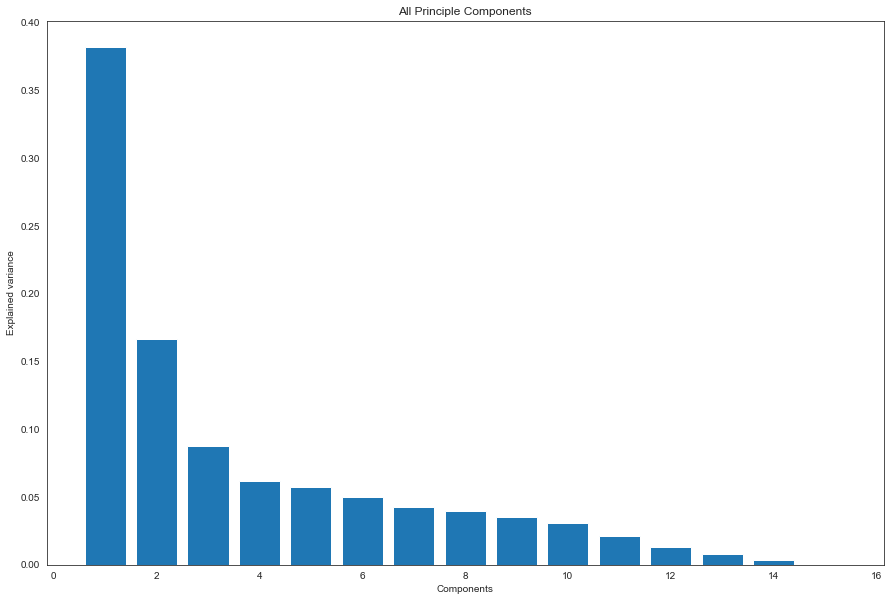

In [52]:
# Run PCA and fit the model
myPCA = PCA()
x = myPCA.fit(chile_data_s_2)

# Plotting the varaince explained by each component
plt.bar(range(1,len(x.explained_variance_ )+1),x.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.title('All Principle Components')
pass

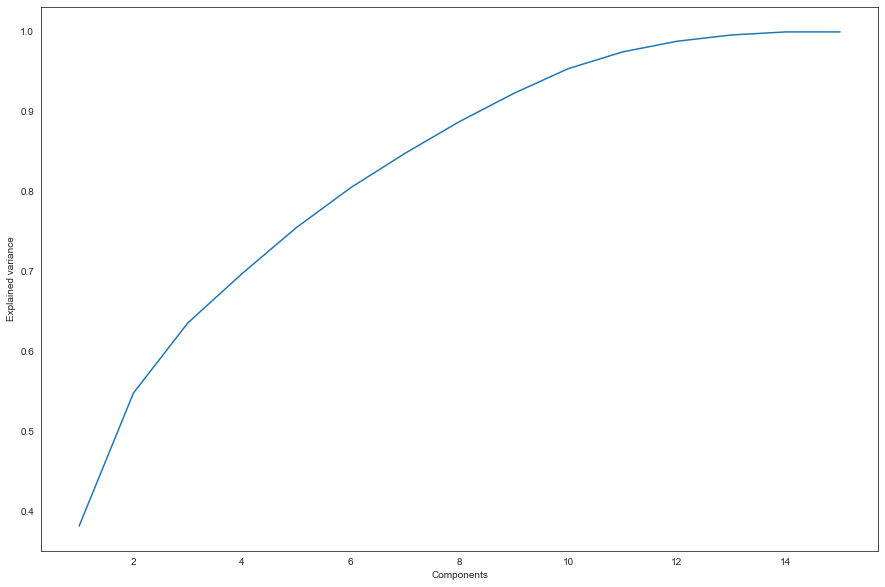

In [53]:
# Deciding on the number of principal componenets to chose
plt.plot(range(1, len(x.explained_variance_)+1), x.explained_variance_ratio_.cumsum())
plt.ylabel('Explained variance')
plt.xlabel('Components')
pass


In [54]:
# Calculate the numeric values of principal components
x.explained_variance_ratio_.cumsum()

array([0.38216167, 0.54861803, 0.63612992, 0.6979197 , 0.75550002,
       0.80538715, 0.84836641, 0.88795521, 0.92322869, 0.95407967,
       0.97500777, 0.98830294, 0.99616425, 1.        , 1.        ])

In [55]:
# Calculate loadings
myPCA = PCA(n_components = 7)
pca_model = myPCA.fit(chile_data_s_2)

# Print
print("The loadings are are \n {}".format(pca_model.components_))

The loadings are are 
 [[-1.33132006e-01 -9.71940725e-02  1.95811562e-01 -1.00633015e-02
   5.76552543e-02  6.68292211e-03 -1.39481743e-01  2.19424069e-01
   5.81024190e-02 -9.80069137e-02  1.89879021e-03 -1.70435214e-02
   1.04726340e-01  2.29038996e-01  2.17724253e-01  4.68836016e-02
   5.03568581e-02 -4.16694955e-02 -7.76542633e-02  4.70672529e-02
   2.18917075e-01 -3.48170710e-02  2.34362576e-01  2.30352223e-01
   2.32391896e-01  2.08386502e-01  2.33117564e-01  1.08427604e-01
   1.85849384e-02 -2.62713787e-02  2.27836728e-01 -2.71694372e-02
   2.06880041e-01  1.90524998e-01  2.24280863e-01  8.20218888e-02
  -1.26775062e-01  1.68544853e-01  2.12374047e-01 -6.44262692e-02
  -6.44486770e-02  2.20135638e-01  1.68277229e-01 -3.69477651e-02
   1.93035546e-01 -2.88823556e-02]
 [ 2.30351292e-01  2.27712050e-01  6.93794581e-02  1.71639585e-01
   2.63718306e-01 -1.95403178e-01  2.61322689e-01  5.34722980e-02
   1.03726706e-01  2.75752726e-01 -1.89730561e-01 -2.92279035e-02
   2.71310833e-01 

In [56]:
# Explore the importance of each feature for principle components
pca = PCA(n_components = 7).fit(chile_data_s_2)
vars = pca.explained_variance_ratio_
c_names = chile_data_s_2.columns
sum = 0

print('Variance:  Projected dimension')
print('------------------------------')
for idx, row in enumerate(pca.components_):
    output = '{0:4.1f}%:    '.format(100.0 * vars[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
                      for val, name in zip(row, c_names))
    sum += 100*vars[idx]
    print(output)

print('Total variance explained by the 7 components {0:4.1f}%'.format(sum))
# Total variance explained by the 7 components 84.8.0%

Variance:  Projected dimension
------------------------------
38.2%:    -0.13 * Density of restaurants per 100,000 habitants + -0.10 * People working at restaurants per 10,000 habitants +  0.20 * Car rental agencies + -0.01 * Hospital beds per 10,000 habitants +  0.06 * Density of ATM machines per 100,000 habitants +  0.01 * Spas + -0.14 * Casinos per 100,000 habitants +  0.22 * Golf courses +  0.06 * Artwork Centers + -0.10 * Density of tourist guides per 100,000 habitants +  0.00 * Thermal centers + -0.02 * Density of sports centers per 10,000 habitants +  0.10 * Phone service penetration pero 1,000 habitants +  0.23 * Density of service stations +  0.22 * Number of certified tourism-operators +  0.05 * Percentage of crime perception +  0.05 * Percentage of homes with at least one crime victim per year + -0.04 * Density of murders per one million habitants + -0.08 * Density of public health complaints per one million habitants +  0.05 * Crime index +  0.22 * Allocated budget for publ

In [57]:
pd.DataFrame(np.column_stack((chile_data_s_2.columns, pca.components_[0]))).sort_values(by = 1, ascending = False)


,0,1
22,Number of reported crimes,0.234363
26,Number of police units,0.233118
24,Number of accidents (roads; air; water),0.232392
23,Number of crimes investigated and resolved,0.230352
13,Density of service stations,0.229039
30,Yearly strikes,0.227837
34,Temporary residents,0.224281
41,Public infrastructure investments related to t...,0.220136
7,Golf courses,0.219424
20,Allocated budget for public safety (millions o...,0.218917


In [58]:
# Calculate factor scores
pca_model = myPCA.fit_transform(chile_data_s_2)
PCcomponents = pd.DataFrame(data = pca_model, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
print("\n The Factor scores are")
PCcomponents


 The Factor scores are


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.373870,0.823256,0.472329,-2.079397,-2.919301,0.141580,0.186033
1,-1.485061,-0.247090,6.228244,-2.115655,1.203540,0.595868,0.757801
2,0.263871,2.084163,1.119329,4.384186,0.480078,3.195863,0.422146
3,-1.814625,0.019734,2.139679,2.229493,-0.772417,-1.927273,-0.772461
4,-0.969405,-1.998904,-0.011820,0.458845,1.718456,-1.177366,-1.155089
5,1.188020,0.340730,-0.711721,-0.291174,-0.750611,1.368108,0.495793
6,14.460293,2.855751,0.166888,-0.525576,-0.548933,-0.744969,-0.624666
7,-1.283626,-0.937935,-0.789281,-1.051599,-2.088445,1.379180,-1.114501
8,-0.680583,-3.431526,-0.366983,-0.213786,-1.694869,-0.554999,-0.381959
9,2.024578,-3.385638,-1.595265,-1.373500,2.088322,0.846775,3.060953


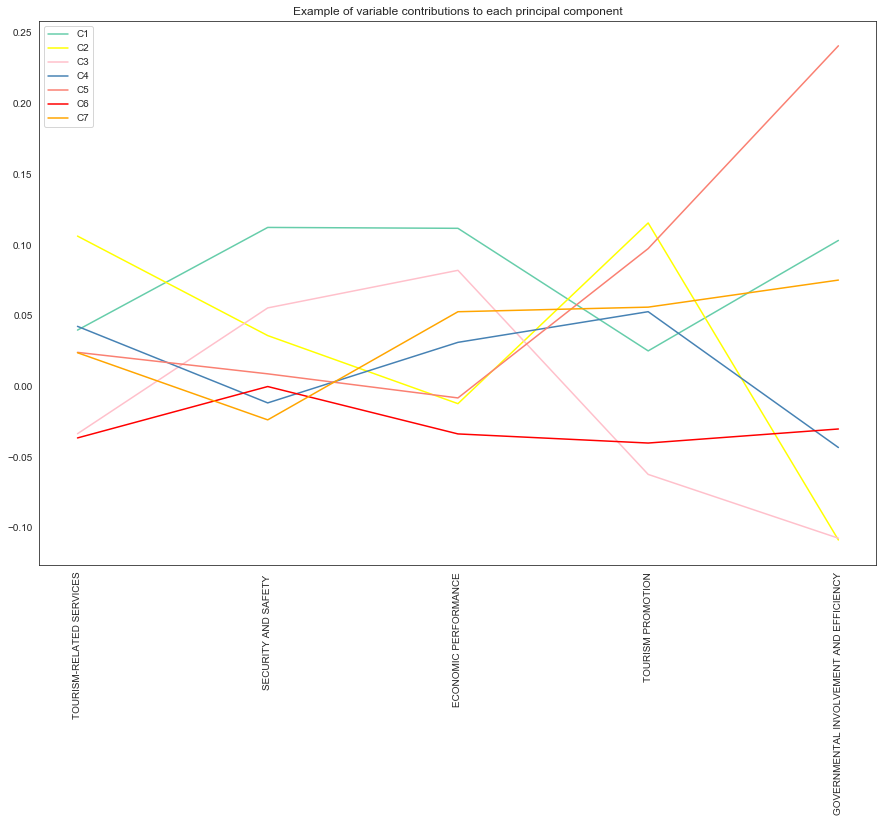

In [59]:
# Example of different variables in each component

# Fit the model
myPCA = PCA(n_components = 7)
pca_model = myPCA.fit(chile_data_s_2)
y_axis = [0,0,0,0,0,0,0]
for i in range(0,7):
    y_axis[i]=[np.mean(pca_model.components_[i][0:15]), np.mean(pca_model.components_[i][15:27]), 
               np.mean(pca_model.components_[i][27:36]), np.mean(pca_model.components_[i][36:41]),
               np.mean(pca_model.components_[i][41:46])]
# Plot
x_axis = ['TOURISM-RELATED SERVICES', 'SECURITY AND SAFETY ', 'ECONOMIC PERFORMANCE', 'TOURISM PROMOTION', 'GOVERNMENTAL INVOLVEMENT AND EFFICIENCY']
plt.plot(x_axis,y_axis[0], color = 'mediumaquamarine', label = "C1")
plt.plot(x_axis,y_axis[1], color = 'yellow', label = "C2")
plt.plot(x_axis,y_axis[2], color = 'pink', label = "C3")
plt.plot(x_axis,y_axis[3], color = 'steelblue', label = "C4")
plt.plot(x_axis,y_axis[4], color = 'salmon', label = "C5")
plt.plot(x_axis,y_axis[5], color = 'red', label = "C6")
plt.plot(x_axis,y_axis[6], color = 'orange', label = "C7")
plt.xticks(rotation = 90)
plt.title('Example of variable contributions to each principal component')
plt.legend()
pass


In [60]:
# Creating a dataframe of weights
weights = pd.DataFrame(np.column_stack((chile_data_s_2.columns, pca_model.components_[0] * 
                                        pca_model.explained_variance_ratio_[0],
                                        pca_model.components_[1] * pca_model.explained_variance_ratio_[1],
                                        pca_model.components_[2] * pca_model.explained_variance_ratio_[2],
                                        pca_model.components_[3] * pca_model.explained_variance_ratio_[3],
                                        pca_model.components_[4] * pca_model.explained_variance_ratio_[4],
                                        pca_model.components_[5] * pca_model.explained_variance_ratio_[5],
                                        pca_model.components_[6] * pca_model.explained_variance_ratio_[6])))
weights = weights.set_index(0)

# Create a weighted average
weights['weighted_average'] = weights.sum(axis = 1)/np.sum(pca_model.explained_variance_ratio_)

# Print
weights.head()

,1,2,3,4,5,6,7,weighted_average
0,,,,,,,,
"Density of restaurants per 100,000 habitants",-0.0508779,0.0383434,-0.00603016,0.00173496,0.00703431,-0.000705732,-0.00638432,-0.019904
"People working at restaurants per 10,000 habitants",-0.0371438,0.0379041,-0.00768655,0.00145828,-0.00263994,0.00488203,0.000651091,-0.003035
Car rental agencies,0.0748317,0.0115487,-0.0072556,0.0104844,0.00355798,-0.00633721,-0.00327852,0.098485
"Hospital beds per 10,000 habitants",-0.00384581,0.0285705,-0.0193489,0.0143164,-0.00104324,0.00105819,0.0132646,0.038865
"Density of ATM machines per 100,000 habitants",0.0220336,0.0438976,0.0153522,0.0128237,0.00260291,0.000892908,0.0075618,0.123961


In [61]:
# Ranking for dimension 6

# Create a dataframe for relevant variables
dim6 = chile_data_s_2.iloc[:, 0:15].mul(weights['weighted_average'][0:15], axis = 1)

# Create a score ranking
dim6['Ranking 6'] = dim6.sum(axis = 1)

# Sort by score
dim6.sort_values(by = 'Ranking 6', ascending = False)

,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants","Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Ranking 6
Regions,,,,,,,,,,,,,,,,
Metropolitana,0.027651,0.003034,0.291889,0.001947,0.163672,0.023149,0.022439,0.344744,0.024562,-0.000959,0.012079,-0.009206,0.259132,0.278443,0.351165,1.793741
Antofagasta,-0.003268,-0.001249,0.054452,0.040697,0.205288,0.003858,0.000265,-0.020279,0.014184,-0.000202,0.042275,-0.010101,0.119666,-0.048206,-0.029492,0.367888
Valparaiso,-0.019993,-0.003931,-0.002533,0.021514,0.056133,-0.034723,0.011771,0.162232,0.028021,-0.000602,0.027177,-0.000799,0.064596,0.049509,-0.019204,0.339170
Magallanes y Antartica,-0.027274,-0.006771,-0.040523,0.081745,0.231735,0.023149,-0.050179,-0.060837,-0.022140,0.005464,0.072472,-0.001523,0.192925,-0.060770,-0.019204,0.318268
Biobio,0.022239,0.003707,-0.002533,0.016326,-0.140644,0.010288,0.013611,0.040558,-0.003113,-0.001116,0.027177,0.003036,-0.066064,0.071844,-0.039780,-0.044464
Atacama,-0.011625,0.000719,0.025960,0.001686,0.060313,0.016719,0.000905,-0.060837,-0.032519,-0.000297,0.027177,0.028103,-0.025273,-0.050998,-0.039780,-0.059748
Los Lagos,-0.002349,0.000620,0.073447,-0.022981,-0.039179,0.010288,-0.000486,-0.040558,-0.001384,-0.000179,-0.048314,0.013978,-0.066565,-0.015402,0.011660,-0.127404
Tarapaca,0.009200,0.000792,-0.135497,-0.055063,0.105328,0.023149,-0.000480,-0.020279,-0.032519,-0.000118,-0.003020,0.044309,0.030722,-0.055884,-0.050069,-0.139428
Arica y Parinacota,-0.001733,0.002422,-0.040523,-0.031902,-0.078544,0.023149,-0.006439,-0.060837,-0.013492,-0.000222,-0.003020,-0.040192,0.083672,-0.063562,0.011660,-0.219562


In [62]:
# Ranking for dimension 7

# Create a dataframe for relevant variables
dim7 = chile_data_s_2.iloc[:, 15:27].mul(weights['weighted_average'][15:27], axis = 1)

# Create a score ranking
dim7['Ranking 7'] = dim7.sum(axis = 1)

# Sort by score
dim7.sort_values(by = 'Ranking 7', ascending = False)

,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Ranking 7
Regions,,,,,,,,,,,,,
Metropolitana,0.047892,0.029820,-0.005519,0.017258,0.031286,0.289907,0.026840,0.384044,0.340181,0.350464,3.653574e-01,0.330985,2.208516
Biobio,0.031120,0.045423,-0.005922,0.023287,0.001409,0.137902,0.040228,0.049240,0.074065,0.034232,-4.069432e-02,0.063199,0.453489
Tarapaca,0.116375,0.209779,0.000929,0.023287,0.058774,-0.071726,0.051703,-0.035178,-0.060643,-0.048898,-1.086283e-02,-0.049287,0.184253
Valparaiso,-0.037363,0.025659,0.000868,0.005492,0.008579,0.002698,0.006758,0.027251,0.073708,0.053211,-3.377299e-02,0.044516,0.177603
Antofagasta,0.291078,0.049584,0.007057,0.023287,-0.021896,-0.011193,-0.041057,-0.017101,-0.042283,-0.026907,-4.230394e-02,-0.041806,0.126460
Araucania,0.060471,0.022538,-0.001839,0.012782,-0.029067,0.041214,-0.016193,-0.010420,-0.007699,-0.011807,-2.534934e-02,-0.007857,0.026774
Los Lagos,-0.020592,-0.067962,0.005720,0.023287,-0.026079,-0.030853,0.024927,-0.031629,-0.007357,-0.032337,-3.237799e-02,-0.013954,-0.209206
Maule,-0.129606,-0.040916,-0.016329,0.013230,0.005591,0.016950,-0.074527,-0.016394,-0.028394,0.017238,-3.227068e-02,0.006199,-0.279228
Coquimbo,-0.069508,-0.050278,0.020358,0.023287,-0.012933,-0.028284,0.002933,-0.037891,-0.042477,-0.035801,-3.731414e-02,-0.028096,-0.296003


In [63]:
# Ranking for dimension 8

# Create a dataframe for relevant variables
dim8 = chile_data_s_2.iloc[:, 27:36].mul(weights['weighted_average'][27:36], axis = 1)

# Create a score ranking
dim8['Ranking 8'] = dim8.sum(axis = 1)

# Sort by score
dim8.sort_values(by = 'Ranking 8', ascending = False)

,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Ranking 8
Regions,,,,,,,,,,
Metropolitana,0.020622,0.034039,-0.006377,0.418184,0.007745,0.419765,0.250552,0.386336,0.087579,1.618444
Antofagasta,-0.000859,0.054850,-0.014695,0.006476,0.014940,0.026760,-0.018619,-0.030050,0.397214,0.436016
Tarapaca,-0.020909,-0.029784,0.128731,-0.025905,0.000817,0.125953,-0.028268,-0.039164,0.000041,0.111514
Valparaiso,0.017758,-0.004810,-0.003026,-0.007401,0.012009,-0.018861,-0.026963,0.047685,0.031123,0.047514
Los Lagos,-0.039526,-0.007585,-0.011188,-0.044409,0.019203,-0.067512,0.178138,-0.036873,-0.029088,-0.038840
O'Higgins,-0.003723,0.018777,-0.014882,-0.021279,0.013341,0.015374,-0.038461,-0.028425,-0.005282,-0.064561
Biobio,0.023487,-0.063082,-0.014469,0.001850,0.009078,-0.022634,-0.016097,-0.026050,0.036683,-0.071235
Atacama,0.002005,0.014614,-0.013610,-0.039783,-0.037554,-0.014765,-0.026491,-0.040943,0.006548,-0.149980
Aysen,-0.026637,0.083986,-0.008440,-0.049035,0.021868,-0.068207,-0.035984,-0.043263,-0.084450,-0.210162


In [64]:
# Ranking for dimension 9

# Create a dataframe for relevant variables
dim9 = chile_data_s_2.iloc[:, 36:41].mul(weights['weighted_average'][36:41], axis = 1)

# Create a score ranking
dim9['Ranking 9'] = dim9.sum(axis = 1)

# Sort by score
dim9.sort_values(by = 'Ranking 9', ascending = False)

,Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Ranking 9
Regions,,,,,,
Metropolitana,0.007732,0.297038,0.315846,0.051934,-1.807070e-18,0.672550
Antofagasta,-0.000633,0.212435,-0.003504,-0.013374,2.520136e-03,0.197444
Coquimbo,0.004745,0.068566,0.070512,-0.008762,-6.927919e-03,0.128133
Atacama,-0.000370,0.083933,-0.070812,0.034985,7.243356e-03,0.054979
Araucania,0.005887,0.025383,-0.033017,0.028272,-1.256697e-02,0.013958
Los Lagos,-0.000941,-0.106259,0.121795,-0.042833,-3.947826e-03,-0.032185
Tarapaca,-0.000939,-0.026613,-0.035719,0.043979,-1.429396e-02,-0.033586
Valparaiso,0.005552,-0.080344,0.002730,0.018828,-8.035737e-03,-0.061269
Biobio,0.006058,-0.033167,0.017137,-0.066802,-1.051886e-02,-0.087292


In [65]:
# Ranking for dimension 10

# Create a dataframe for relevant variables
dim10 = chile_data_s_2.iloc[:, 41:46].mul(weights['weighted_average'][41:46], axis = 1)

# Create a score ranking
dim10['Ranking 10'] = dim10.sum(axis = 1)

# Sort by score
dim10.sort_values(by = 'Ranking 10', ascending = False).head()

,Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development,Ranking 10
Regions,,,,,,
Metropolitana,0.231341,0.146845,0.062107,0.172525,0.034371,0.647190
Los Lagos,0.039541,0.126108,-0.023540,0.060047,-0.017186,0.184970
Biobio,0.094131,0.030705,-0.138642,0.161778,-0.068743,0.079230
Antofagasta,-0.053708,0.037057,0.045566,0.013379,0.034371,0.076666
Valparaiso,0.040477,0.000473,-0.032905,0.016581,0.034371,0.058999


In [66]:
# Create an aggregated dataframe with all scores
scoring_data2 = pd.concat([dim6.iloc[:,-1:], dim7.iloc[:,-1:], dim8.iloc[:,-1:], dim9.iloc[:,-1:], 
                            dim10.iloc[:,-1:]], axis = 1)

# Print
scoring_data2

,Ranking 6,Ranking 7,Ranking 8,Ranking 9,Ranking 10
Regions,,,,,
Arica y Parinacota,-0.219562,-0.431607,-0.218964,-0.127449,-0.193358
Tarapaca,-0.139428,0.184253,0.111514,-0.033586,-0.196716
Antofagasta,0.367888,0.126460,0.436016,0.197444,0.076666
Atacama,-0.059748,-0.323617,-0.149980,0.054979,-0.156984
Coquimbo,-0.327888,-0.296003,-0.271570,0.128133,-0.040475
Valparaiso,0.339170,0.177603,0.047514,-0.061269,0.058999
Metropolitana,1.793741,2.208516,1.618444,0.672550,0.647190
O'Higgins,-0.319237,-0.415101,-0.064561,-0.184920,-0.053559
Maule,-0.494721,-0.279228,-0.305912,-0.114380,-0.006079


In [67]:
final_scoring_data = pd.concat([dim1.iloc[:,-1:],dim2.iloc[:,-1:],dim3.iloc[:,-1:],dim4.iloc[:,-1:],dim5.iloc[:,-1:],
                               dim6.iloc[:,-1:], dim7.iloc[:,-1:], dim8.iloc[:,-1:], dim9.iloc[:,-1:], dim10.iloc[:,-1:]], axis = 1)
final_scoring_data['Overall Ranking'] = final_scoring_data[list(final_scoring_data.columns)].sum(axis=1)
#final_scoring_data = final_scoring_data.sort_index()

In [68]:
final_scoring_data

,Ranking 1,Ranking 2,Ranking 3,Ranking 4,Ranking 5,Ranking 6,Ranking 7,Ranking 8,Ranking 9,Ranking 10,Overall Ranking
Valparaiso,0.692363,0.174514,0.249814,0.405196,0.380127,0.339170,0.177603,0.047514,-0.061269,0.058999,2.464031
Tarapaca,-0.173136,-0.013629,-0.063857,-0.051780,-0.111462,-0.139428,0.184253,0.111514,-0.033586,-0.196716,-0.487826
O'Higgins,-0.571647,-0.122728,-0.138538,-0.318736,-0.295041,-0.319237,-0.415101,-0.064561,-0.184920,-0.053559,-2.484068
Metropolitana,2.505190,0.512320,1.245244,1.013256,1.231514,1.793741,2.208516,1.618444,0.672550,0.647190,13.447966
Maule,-0.476902,-0.145830,-0.227193,-0.242213,-0.240416,-0.494721,-0.279228,-0.305912,-0.114380,-0.006079,-2.532874
Magallanes y Antartica,-0.241153,-0.050395,-0.178714,-0.167379,-0.057579,0.318268,-0.475825,-0.242200,-0.206185,-0.120398,-1.421559
Los Rios,-0.294472,0.045124,-0.245964,-0.086307,-0.333723,-0.381948,-0.423620,-0.316565,-0.131099,-0.070488,-2.239061
Los Lagos,0.204969,0.577425,0.254603,0.254766,0.565572,-0.127404,-0.209206,-0.038840,-0.032185,0.184970,1.634671
Coquimbo,-0.250916,0.091873,-0.128560,0.049329,-0.217581,-0.327888,-0.296003,-0.271570,0.128133,-0.040475,-1.263659
Biobio,0.312954,-0.259354,0.138733,-0.096586,0.019311,-0.044464,0.453489,-0.071235,-0.087292,0.079230,0.444784


In [69]:
# Highlight dataframe values with colors

# attach CSS classes to each cell
final_scoring_data.style.highlight_null().render().split('\n')[:10]

# Create a function for negative values (red)
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

# Create a function for max values (yellow)
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply styles
final_scoring_data.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,Ranking 1,Ranking 2,Ranking 3,Ranking 4,Ranking 5,Ranking 6,Ranking 7,Ranking 8,Ranking 9,Ranking 10,Overall Ranking
Valparaiso,0.692363,0.174514,0.249814,0.405196,0.380127,0.339170,0.177603,0.047514,-0.061269,0.058999,2.464031
Tarapaca,-0.173136,-0.013629,-0.063857,-0.051780,-0.111462,-0.139428,0.184253,0.111514,-0.033586,-0.196716,-0.487826
O'Higgins,-0.571647,-0.122728,-0.138538,-0.318736,-0.295041,-0.319237,-0.415101,-0.064561,-0.184920,-0.053559,-2.484068
Metropolitana,2.505190,0.512320,1.245244,1.013256,1.231514,1.793741,2.208516,1.618444,0.672550,0.647190,13.447966
Maule,-0.476902,-0.145830,-0.227193,-0.242213,-0.240416,-0.494721,-0.279228,-0.305912,-0.114380,-0.006079,-2.532874
Magallanes y Antartica,-0.241153,-0.050395,-0.178714,-0.167379,-0.057579,0.318268,-0.475825,-0.242200,-0.206185,-0.120398,-1.421559
Los Rios,-0.294472,0.045124,-0.245964,-0.086307,-0.333723,-0.381948,-0.423620,-0.316565,-0.131099,-0.070488,-2.239061
Los Lagos,0.204969,0.577425,0.254603,0.254766,0.565572,-0.127404,-0.209206,-0.038840,-0.032185,0.184970,1.634671
Coquimbo,-0.250916,0.091873,-0.128560,0.049329,-0.217581,-0.327888,-0.296003,-0.271570,0.128133,-0.040475,-1.263659
Biobio,0.312954,-0.259354,0.138733,-0.096586,0.019311,-0.044464,0.453489,-0.071235,-0.087292,0.079230,0.444784


In [70]:
## from __future__ import division

def rescale(values, new_min = 10, new_max = 90):
    output = []
    old_min, old_max = min(values), max(values)

    for v in values:
        new_v = (new_max - new_min) / (old_max - old_min) * (v - old_min) + new_min
        output.append(new_v)

    return output

scaled_array = rescale(scaled_array)
#df_normalized = rescale(dim9['Average number of internet searches for main tourist attractions'])

NameError: name 'scaled_array' is not defined

In [ ]:
scaled_array = final_scoring_data.values.flatten()

In [ ]:
x = np.reshape(scaled_array, (15, 11))

In [ ]:
df_normalized = pd.DataFrame(x)

In [ ]:
df_normalized = pd.DataFrame(df_normalized)
df_normalized.to_csv('ranking1.csv')